# P1-P3-Pytorch简介和安装 以及基本使用方法

In [29]:
import torch 
from torch import tensor
torch.__version__ 
import torch.nn as nn

初始化矩阵

In [30]:
print(torch.empty(5,3)) # 矩阵
print(torch.rand(5,3)) # 随机值
print(torch.zeros(5,3,dtype = torch.long)) # 0矩阵

tensor([[-2.5025e-01,  1.5793e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])
tensor([[0.5792, 0.9322, 0.6380],
        [0.6627, 0.6874, 0.6411],
        [0.2202, 0.1785, 0.4199],
        [0.3387, 0.2260, 0.2241],
        [0.2036, 0.4433, 0.2253]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


直接传入数据转为tensor

In [31]:
x = torch.tensor([1,2,3])
x = x.new_ones(5,3,dtype = torch.double) #
x = torch.randn_like(x, dtype = torch.float) #
print(x)


tensor([[-0.5353,  0.5909,  1.0998],
        [ 0.5299,  1.0886, -1.4698],
        [ 0.3631,  2.1722,  1.1755],
        [-1.7436, -0.7330, -2.0677],
        [-0.2416,  2.8644, -0.5393]])


大小矩阵

In [32]:
x.size()

torch.Size([5, 3])

基本计算方法

In [33]:
# +
y = torch.rand(5,3)
print(torch.add(x,y))

tensor([[-0.4996,  1.1605,  1.1506],
        [ 1.0328,  1.7449, -0.5663],
        [ 0.3724,  2.6681,  1.2747],
        [-1.2216,  0.0374, -1.8354],
        [ 0.3408,  3.6744, -0.0463]])


In [34]:
# idex
x[:,1]
# view 操作改变矩阵维度
x = torch.randn(4,4)
print(x)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())
print(y,z)

tensor([[ 1.7787, -1.5442,  0.1752,  1.3746],
        [ 0.2293,  1.1607,  0.1316,  0.7490],
        [ 0.2020,  0.2516, -0.3213,  0.4471],
        [ 0.7624,  0.5931, -0.9407, -0.2907]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([ 1.7787, -1.5442,  0.1752,  1.3746,  0.2293,  1.1607,  0.1316,  0.7490,
         0.2020,  0.2516, -0.3213,  0.4471,  0.7624,  0.5931, -0.9407, -0.2907]) tensor([[ 1.7787, -1.5442,  0.1752,  1.3746,  0.2293,  1.1607,  0.1316,  0.7490],
        [ 0.2020,  0.2516, -0.3213,  0.4471,  0.7624,  0.5931, -0.9407, -0.2907]])


与numpy协同操作

In [35]:
import numpy as np
a = torch.ones(5)
b = a.numpy()
print(b)
a = np.ones(5)
b = torch.from_numpy(a)
print(b)


[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# P5 autograd 自动求导机制

In [36]:
x = torch.randn(3,4, requires_grad=True)
# 或者
x

tensor([[ 1.2757, -1.6737, -0.0333,  0.2124],
        [ 0.1327, -0.4106,  0.7758, -0.4754],
        [ 0.9591,  0.6132,  0.4185,  2.7767]], requires_grad=True)

In [37]:
b = torch.randn(3,4)
b.requires_grad=True
b

tensor([[ 0.5910,  0.1422,  0.6938,  0.6843],
        [ 0.4403, -0.5753,  2.3680, -0.5827],
        [-1.4766, -0.1093,  1.2765,  0.4944]], requires_grad=True)

In [38]:
t = x + b
y = t.sum()
y

tensor(8.5177, grad_fn=<SumBackward0>)

In [39]:
y.backward()
b.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

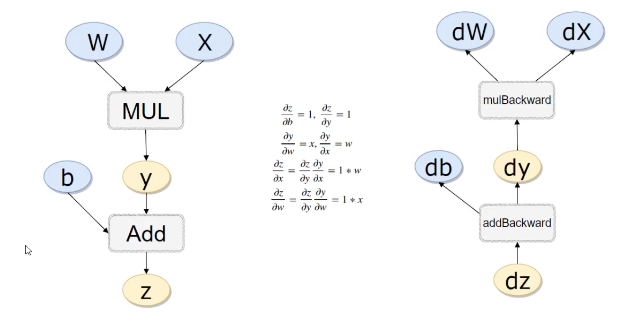

In [40]:
x = torch.rand(1)
b = torch.rand(1,requires_grad=True)
w = torch.rand(1,requires_grad=True)
y =w*x
z = y+b 

In [41]:
x.requires_grad, b.requires_grad, w.requires_grad, y.requires_grad

(False, True, True, True)

In [42]:
x.is_leaf, w.is_leaf,b.is_leaf, y.is_leaf, z.is_leaf


(True, True, True, False, False)

反向传播计算

In [43]:
z.backward(retain_graph=True) # 如果不清空会累加起来

In [44]:
w.grad

tensor([0.4287])

In [45]:
b.grad

tensor([1.])

# P6-7做一个线性回归

构造一组输入数据x和对应的标签y

In [46]:
x_values = [i for i in range(11)]
x_train = np.array(x_values,dtype = np.float32)
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [47]:
y_values = [2*i for i in x_values]
y_train = np.array(y_values,dtype = np.float32)
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

构建线性回归，不加激活函数的全连接层

In [48]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        out = self.linear(x)
        return out

In [49]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

指定好参数和损失函数

In [50]:
epochs = 1000
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
## 分类：交叉熵
## 常规任务：MSELoss

训练模型

In [51]:
for epoch in range(epochs):
    # 转为tensor

    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
    # 梯度清理
    optimizer.zero_grad()
    #前向传播
    outputs = model(inputs) 
    # 计算损失
    loss = criterion(outputs, labels)
    # 反向传播
    loss.backward()
    # 更新权重参数
    optimizer.step()
    if epoch % 50 ==0:
        print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 180.4337921142578
epoch 50, loss 0.1929696947336197
epoch 100, loss 0.07953990250825882
epoch 150, loss 0.07514546066522598
epoch 200, loss 0.0710524246096611
epoch 250, loss 0.06718247383832932
epoch 300, loss 0.06352321803569794
epoch 350, loss 0.060063306242227554
epoch 400, loss 0.05679187551140785
epoch 450, loss 0.05369853973388672
epoch 500, loss 0.05077372491359711
epoch 550, loss 0.04800825193524361
epoch 600, loss 0.045393314212560654
epoch 650, loss 0.04292093589901924
epoch 700, loss 0.040583137422800064
epoch 750, loss 0.03837272897362709
epoch 800, loss 0.03628259152173996
epoch 850, loss 0.034306399524211884
epoch 900, loss 0.03243786469101906
epoch 950, loss 0.030671121552586555


测试预测结果

模型保存


In [52]:
torch.save(model.state_dict(),"../model/model.pkl")
model.load_state_dict(torch.load("../model/model.pkl"))

<All keys matched successfully>

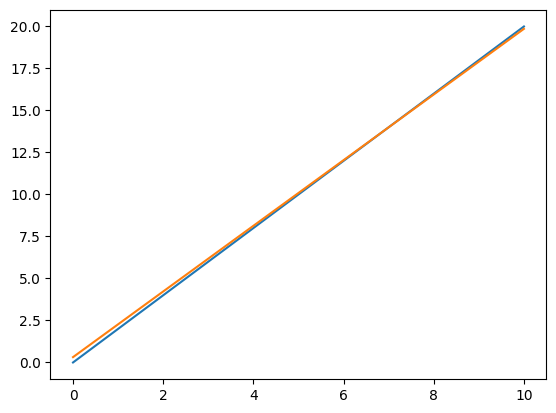

In [53]:
net = LinearRegressionModel(input_dim, output_dim)
net.load_state_dict(torch.load("../model/model.pkl",map_location="cpu"))
net.to("cpu")
net.eval()

predicated = net(torch.from_numpy(x_train).requires_grad_()).data.numpy()

import matplotlib.pyplot as plt
import numpy as np
 
 
plt.plot(x_train,y_train,x_train,predicated)
plt.show()

# P8Tensor 形式
- 0：scalar :数值 
- 1: vector :向量
- 2：matrix ：矩阵
- 3: n-dimensional tensor :高维

In [54]:
# scalar
x = tensor(42.)
x.dim()
print(2 * x)

# vector
v = tensor([1.5,3.3])
print(v)
print(v.dim())
print(v.size())




tensor(84.)
tensor([1.5000, 3.3000])
1
torch.Size([2])


In [55]:
M = tensor([[1,2],[3,4]])
print(M)
print(M.matmul(M)) # 内积

tensor([[1, 2],
        [3, 4]])
tensor([[ 7, 10],
        [15, 22]])


# P9hub模块
调用别人的模块
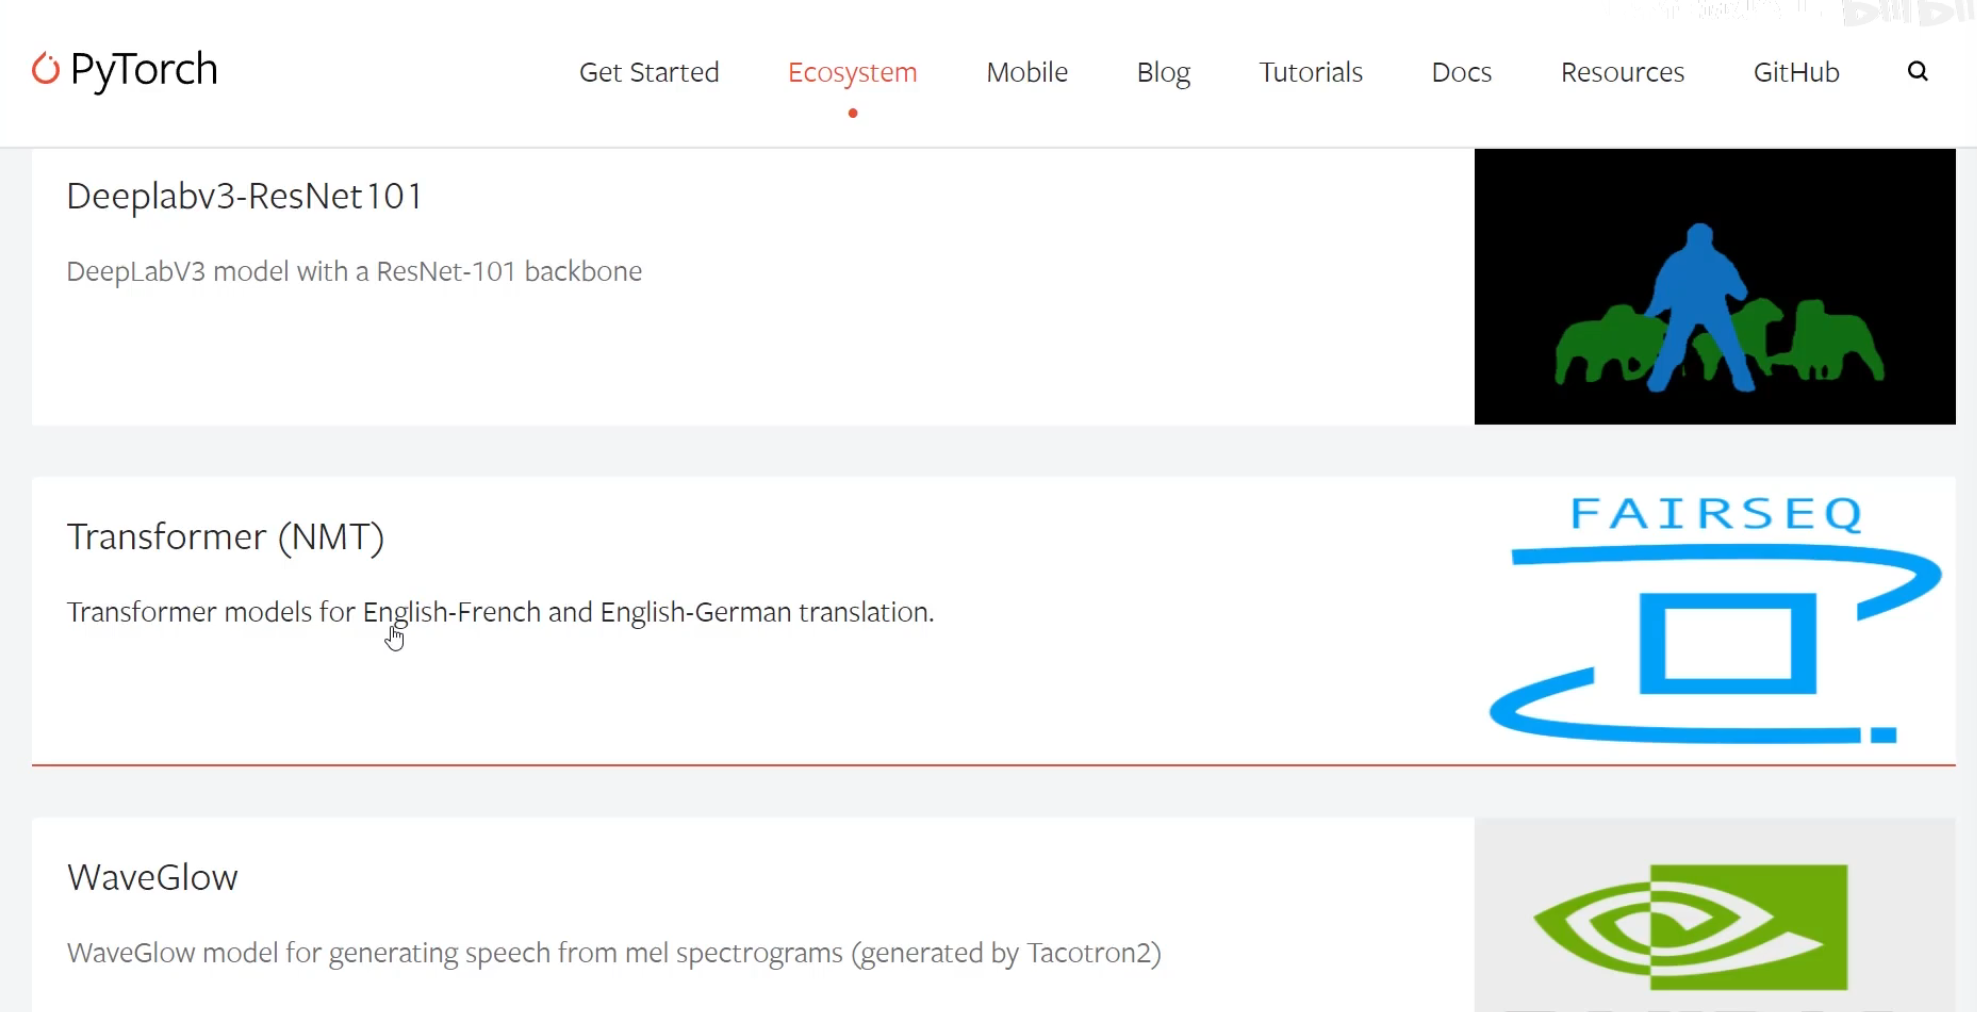

# P10-11气温预测

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

features = pd.read_csv("../data/temps/temps.csv")
features.head()

year  month  day  week  temp_2  temp_1  average  actual  friend
0  2016      1    1   Fri      45      45     45.6      45      29
1  2016      1    2   Sat      44      45     45.7      44      61
2  2016      1    3   Sun      45      44     45.8      41      56
3  2016      1    4   Mon      44      41     45.9      40      53
4  2016      1    5  Tues      41      40     46.0      44      41

In [58]:
print("数据维度：",features.shape)

数据维度： (348, 9)


In [59]:
#处理时间数据
import datetime

years = features["year"]
months = features["month"]
days = features["day"]
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,"%Y-%m-%d") for date in dates]

dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

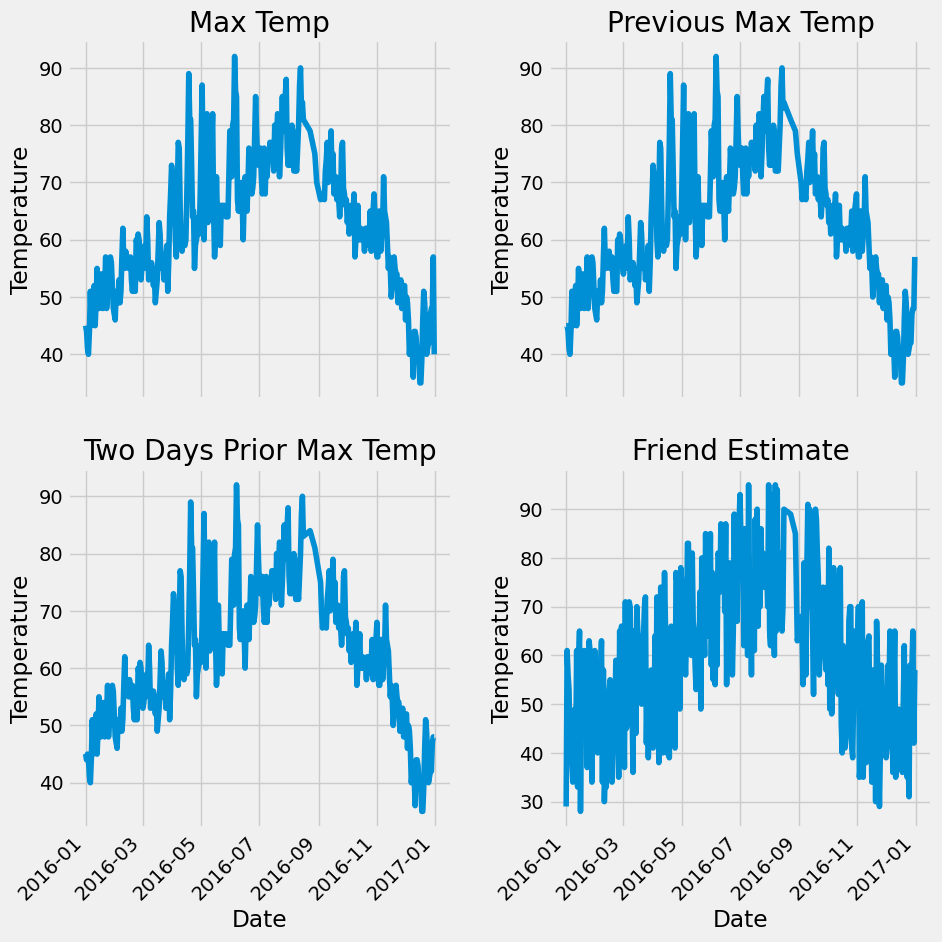

In [60]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')
 
# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)
 
# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')
 
# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')
 
# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')
 
# 我的逗逼朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')
 
plt.tight_layout(pad=2)

In [61]:
#独热编码
features=pd.get_dummies(features)
features.head()

year  month  day  temp_2  temp_1  average  actual  friend  week_Fri  \
0  2016      1    1      45      45     45.6      45      29      True   
1  2016      1    2      44      45     45.7      44      61     False   
2  2016      1    3      45      44     45.8      41      56     False   
3  2016      1    4      44      41     45.9      40      53     False   
4  2016      1    5      41      40     46.0      44      41     False   

   week_Mon  week_Sat  week_Sun  week_Thurs  week_Tues  week_Wed  
0     False     False     False       False      False     False  
1     False      True     False       False      False     False  
2     False     False      True       False      False     False  
3      True     False     False       False      False     False  
4     False     False     False       False       True     False

In [62]:
#标签
labels=np.array(features['actual'])
#在特征中去掉标签
features=features.drop('actual',axis=1)
#名字单独保存一下，以防丢失
feature_list=list(features.columns)
#转化成合适的形式
featuresa=np.array(features)

In [63]:
#标准化处理
from sklearn import preprocessing
input_features=preprocessing.StandardScaler().fit_transform(features)
print((input_features[1]))
print((labels[1]))


[ 0.         -1.5678393  -1.54267126 -1.56929813 -1.49443549 -1.33755752
  0.06187741 -0.40961596 -0.40482045  2.44131112 -0.40482045 -0.40482045
 -0.41913682 -0.40482045]
44


In [64]:
#手动构造网络模型
x=torch.tensor(input_features,dtype=float) # type: ignore
y=torch.tensor(labels,dtype=float) # type: ignore
 
#权重参数初始化
weights=torch.randn((14,128),dtype=float,requires_grad=True)  # type: ignore
biases=torch.randn(128,dtype=float,requires_grad=True)  # type: ignore
weights2=torch.randn((128,1),dtype=float,requires_grad=True) # type: ignore
biases2=torch.randn(1,dtype=float,requires_grad=True) # type: ignore 
learning_rate=0.001#学习率
losses=[]
 
for i in range(1000):
    #计算隐层
    hidden=x.mm(weights)+biases
    #加入激活函数
    hidden=torch.relu(hidden)
    #预测结果
    predictions=hidden.mm(weights2)+biases2
    #计算损失
    loss=torch.mean((predictions-y) **2)
    losses.append(loss.data.numpy())
    #打印损失值
    if i % 100 == 0:
        print('loss:',loss)
    #反向传播计算
    loss.backward()
 
        
    #更新参数
    weights.data.add_(- learning_rate * weights.grad.data)  
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases2.data.add_(- learning_rate * biases2.grad.data)
        
    # 每次迭代都得记得清空
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()

loss: tensor(2602.3295, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(151.8136, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(146.2359, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(144.1451, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(142.9840, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(142.2272, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.6830, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.2767, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.9651, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.7148, dtype=torch.float64, grad_fn=<MeanBackward0>)


# P12更简单的网络模型

In [65]:
input_size = input_features.shape[1]
print(input_features.shape[1])
hidden_size = 128
output_size = 1
batch_size = 16
# 网络
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)
# 代价函数
cost = torch.nn.MSELoss(reduction='mean')
# 参数优化
optimizer = torch.optim.Adam(my_nn.parameters(), lr = 0.001)
 
 
# 训练网络
losses = []
for i in range(1000):
    batch_loss = []
    # MINI-Batch方法来进行训练
    for start in range(0, len(input_features), batch_size):
        end = start + batch_size if start + batch_size < len(input_features) else len(input_features)
        xx = torch.tensor(input_features[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(labels[start:end], dtype = torch.float, requires_grad = True)
        prediction = my_nn(xx)
        loss = cost(prediction, yy)
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # 打印损失
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss)) 

14
0 3936.3877
100 37.664486
200 35.64182
300 35.293076
400 35.13585
500 35.006397
600 34.888752
700 34.773342
800 34.656803
900 34.537575


In [66]:
# 预测训练结果 
x = torch.tensor(input_features, dtype = torch.float)
predict = my_nn(x).data.numpy()
print(predict)

[[47.383457]
 [47.47193 ]
 [47.2049  ]
 [46.794308]
 [47.527317]
 [46.957005]
 [47.5594  ]
 [48.78468 ]
 [48.5445  ]
 [49.72504 ]
 [50.989292]
 [49.8261  ]
 [49.546345]
 [50.508175]
 [49.391785]
 [49.54501 ]
 [51.528774]
 [51.904198]
 [52.450382]
 [51.190678]
 [50.914516]
 [50.681587]
 [52.257053]
 [52.64394 ]
 [51.800373]
 [53.03169 ]
 [53.50497 ]
 [53.688522]
 [53.564953]
 [53.43304 ]
 [52.41762 ]
 [49.931305]
 [50.75748 ]
 [51.28983 ]
 [51.273464]
 [51.236427]
 [52.18394 ]
 [51.85671 ]
 [52.57105 ]
 [54.25974 ]
 [55.509785]
 [55.057354]
 [54.611397]
 [55.120403]
 [55.788906]
 [55.041847]
 [54.71465 ]
 [54.77422 ]
 [53.98036 ]
 [54.539837]
 [54.59441 ]
 [55.43455 ]
 [55.81164 ]
 [56.65195 ]
 [56.38087 ]
 [57.974834]
 [57.48415 ]
 [55.5482  ]
 [56.083622]
 [56.49291 ]
 [56.881702]
 [56.92261 ]
 [57.925335]
 [57.446922]
 [57.078426]
 [56.41438 ]
 [56.69145 ]
 [57.84019 ]
 [57.49222 ]
 [56.57706 ]
 [57.049744]
 [56.512188]
 [55.922413]
 [57.276394]
 [58.109932]
 [60.087456]
 [60.908726]

In [67]:
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
 

# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
 
# 同理，再创建一个来存日期和其对应的模型预测值
months = features['month']
days = features['day']
years = features['year']

 
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
 
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
 
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)}) 

Text(0.5, 1.0, 'Actual and Predicted Values')

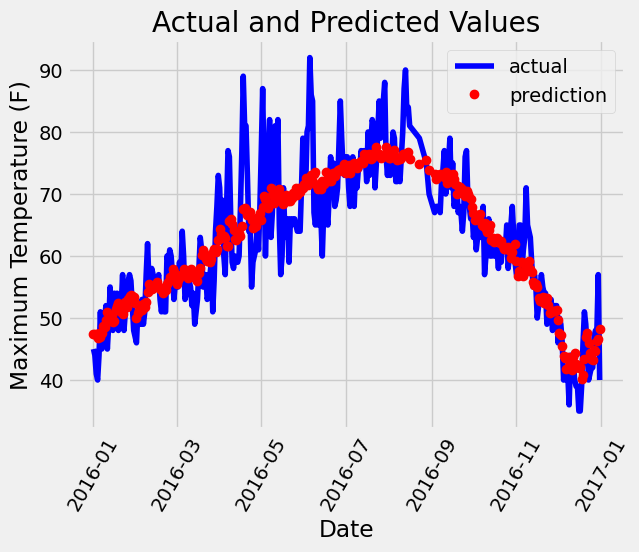

In [68]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
 
# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 60); 
plt.legend()
 
# 图名
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')

# P13-15神经网络分类任务

In [3]:
%matplotlib inline
#查看本机torch的版本
import torch
print(torch.__version__)#打印torch的版本

2.1.0+cpu


## 1.Mnist分类任务
网络基本构建与训练方法，常用函数解析

torch.nn.functional模块

nn.Module模块

学习方法：边用边查，多打印，duo'gua

使用jupyter的优点，可以打印出每一个步骤。

## 2.读取数据集
自动下载
观察数据的结构

In [9]:
import tensorflow as tf
from tensorflow import keras
 
import numpy as np
import matplotlib.pyplot as plt
 
 
(x_train, y_train_labels), (x_valid, y_valid_labels) = keras.datasets.mnist.load_data()

x_train = x_train[:20000,:,:].reshape(-1,784)
x_valid = x_valid[:1000,:,:].reshape(-1,784)
y_train_labels = y_train_labels[:20000].reshape(-1)
y_valid_labels = y_valid_labels[:1000].reshape(-1)
# print(x_train,x_train.shape)
# print(x_test,x_test.shape)
# print(y_train_labels, y_train_labels.shape)
# print(y_test_labels,y_test_labels.shape)



显示灰度图像

(20000, 784) 5


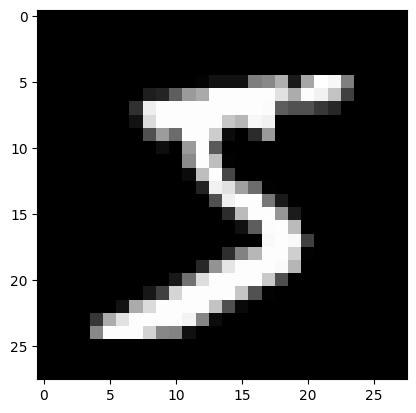

In [10]:
from matplotlib import pyplot
import numpy as np
index = 0
pyplot.imshow(x_train[index].reshape((28, 28)), cmap="gray")
print(x_train.shape,y_train_labels[index])


In [11]:
import tensorflow as tf
import torch.nn.functional as F
from tensorflow import keras
 
import numpy as np
import matplotlib.pyplot as plt
 
fashion_mnist = keras.datasets.mnist
 
(x_train, y_train_labels), (x_valid, y_valid_labels) = fashion_mnist.load_data()

x_train = x_train[:20000,:,:].reshape(-1,784)
x_valid = x_valid[:1000,:,:].reshape(-1,784)
y_train_labels = y_train_labels[:20000].reshape(-1)
y_valid_labels = y_valid_labels[:1000].reshape(-1)
# print(x_train,x_train.shape)
# print(x_test,x_test.shape)
# print(y_train_labels, y_train_labels.shape)
# print(y_test_labels,y_test_labels.shape)



In [12]:
from torch.utils.data import TensorDataset, DataLoader,Dataset,random_split

In [14]:
x_train, y_train,x_valid,y_valid = map(
    torch.tensor,(x_train,y_train_labels,x_valid,y_valid_labels)
)
x_train = torch.tensor(x_train, dtype = torch.float)
y_train = torch.tensor(y_train_labels)

y_train = F.one_hot(y_train.to(torch.int64), num_classes=10)    # n为类别数
y_train = torch.tensor(y_train, dtype = torch.float)

x_valid = torch.tensor(x_valid, dtype = torch.float)
y_valid = torch.tensor(y_valid_labels)
y_valid = F.one_hot(y_valid.to(torch.int64), num_classes=10)    # n为类别数
y_valid = torch.tensor(y_valid, dtype = torch.float)

n, c = x_train.shape
# print(x_train, x_train.shape)
print(y_train, y_train.shape, y_train.min(), y_train.max())
# print(x_valid, x_valid.shape)
print(y_valid[:10],y_valid.shape, y_valid.min(), y_valid.max())

train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
batch_size = 64
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True),
valid_dl = DataLoader(valid_ds, batch_size=batch_size*2, shuffle=False),

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]]) torch.Size([20000, 10]) tensor(0.) tensor(1.)
tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]) torch.Size([1000, 10]) tensor(0.) tensor(1.)


In [15]:
import torch
from torch.utils.data import DataLoader

# Assuming you have a DataLoader called 'train_loader'
for batch in train_dl:
    # Each batch is a tuple containing input data and labels
    inputs, labels = batch
    
    # Print or examine the batch data
    print("Batch input data:")
    print(inputs)
    print("Batch labels:")
    print(labels)
    
    # You can also perform any desired operations or analysis on the batch here


ValueError: too many values to unpack (expected 2)

## torch.nn.functional 很多层和函数在这里都会见到
torch.nn.functional中有很多功能，后续会常用的。那什么时候使用nn.Module，什么时候使用nn.functional呢？一般情况下，如果模型有可学习的参数，最好用nn.Module，其他情nn.functional相对更简单一些



In [ ]:
loss_func = F.cross_entropy # 交叉熵函数

def model_test(xb,weights,bias):
    return xb.matmul(weights) +  bias

In [ ]:
bs = 64
xb =x_train[0:bs] # a mini-batch from x
yb = y_train[0:bs]
print(xb.shape, yb.size())


torch.Size([64, 784]) torch.Size([64, 10])


In [ ]:
weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 
# print(weights)
#线性代数的相关知识，weights与输入想乘之后，需要输出的格式为10分类，所以的weights的矩阵为(784,10)
bias = torch.zeros(10, dtype = torch.float, requires_grad=True)#偏执的设置，常数值作为初始化，因为这个东西对模型的影###响不是很大。
# print(bias.size())
print(loss_func(model_test(xb,weights,bias),yb))#计算真实值和预测值之间的误差



tensor(3726.9553, grad_fn=<DivBackward1>)


In [ ]:
from torch import nn

class Mnist_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,256)
        # self.hidden3 = nn.Linear(128,256)
        self.out = nn.Linear(256,10)
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        # x = F.relu(self.hidden3(x))
        x = self.out(x)
        return x

In [ ]:
net = Mnist_nn()
print(net)

Mnist_nn(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


## 打印权重和偏置

In [ ]:
for name, parameter in net.named_parameters():
    print(name,parameter,parameter.size())

hidden1.weight Parameter containing:
tensor([[ 0.0023, -0.0287, -0.0204,  ...,  0.0121, -0.0356, -0.0145],
        [ 0.0286,  0.0087,  0.0314,  ..., -0.0088, -0.0295, -0.0005],
        [-0.0086,  0.0311, -0.0247,  ...,  0.0303, -0.0024,  0.0228],
        ...,
        [ 0.0090,  0.0311, -0.0214,  ...,  0.0065, -0.0314,  0.0108],
        [-0.0192, -0.0061, -0.0161,  ..., -0.0049, -0.0057, -0.0040],
        [ 0.0299,  0.0250, -0.0192,  ...,  0.0147,  0.0322, -0.0331]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 0.0036,  0.0033,  0.0049, -0.0134, -0.0296, -0.0309, -0.0338,  0.0056,
         0.0326,  0.0266, -0.0244, -0.0313,  0.0200, -0.0174, -0.0108, -0.0340,
         0.0229,  0.0263, -0.0200, -0.0227,  0.0117, -0.0314, -0.0047,  0.0089,
         0.0196, -0.0204, -0.0253, -0.0033,  0.0210, -0.0012, -0.0277,  0.0283,
         0.0201,  0.0103,  0.0328,  0.0036,  0.0177, -0.0224, -0.0184,  0.0221,
         0.0227, -0.0181, -0.0254, -0.0175, 

## 使用TensorDataset 和DataLoader

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size = bs,shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size = bs*2)

In [ ]:
def get_data(train_ds, valid_ds,bs):
    return (
        DataLoader(train_ds,batch_size=bs,shuffle=True),
        DataLoader(valid_ds,batch_size=bs*2),
    )


In [ ]:
from torch import optim
from torch.optim.lr_scheduler import LambdaLR
def get_model():
    model = Mnist_nn()
    optimizer = optim.SGD(model.parameters(), lr = 0.001)
    scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: 1/(epoch+1))
    return model, optimizer, scheduler



In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None,sche=None):
    loss = loss_func(model(xb),yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    if sche is not None:    
        sche.step()
    return loss.item(),len(xb)

In [ ]:
import numpy as np

def fit(steps,model,loss_func,opt,sche,train_dl,valid_dl):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    model.to(device)
    losses= []
    nums =[]
    for step in range(steps):       
        model.train()
        for xb,yb in train_dl:
            losses,nums  = zip( 
                *[loss_batch(model,loss_func,xb.to(device),yb.to(device),opt)]
                # *[loss_batch(model,loss_func,xb.to(device),yb.to(device),opt)]
            )
        train_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        model.eval()
        with torch.no_grad():
            losses,nums  = zip(
                *[loss_batch(model,loss_func, xb.to(device),yb.to(device)) for xb,yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        
        print("当前step:" + str(step),"lr:" + str(opt.param_groups[0]['lr']),"测试集损失：",str(round(train_loss,5)),"验证集损失：",str(round(val_loss,5)))
    return model




In [ ]:
train_dl, valid_dl = get_data(train_ds,valid_ds, bs)
model, opt,sche = get_model()
print(train_dl)
print(valid_dl)
print(model)
print(opt)

Mnist_nn(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.001
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
train_finish_model = fit(20, model, loss_func, opt, sche , train_dl, valid_dl)
print(train_finish_model)

cpu
当前step:0 lr:0.001 测试集损失： 0.00935 验证集损失： 0.19101
当前step:1 lr:0.001 测试集损失： 0.00949 验证集损失： 0.18612
当前step:2 lr:0.001 测试集损失： 0.00751 验证集损失： 0.18848
当前step:3 lr:0.001 测试集损失： 0.0041 验证集损失： 0.18982
当前step:4 lr:0.001 测试集损失： 0.01021 验证集损失： 0.18746
当前step:5 lr:0.001 测试集损失： 0.01624 验证集损失： 0.19215
当前step:6 lr:0.001 测试集损失： 0.00902 验证集损失： 0.19078
当前step:7 lr:0.001 测试集损失： 0.01492 验证集损失： 0.18925
当前step:8 lr:0.001 测试集损失： 0.01357 验证集损失： 0.18818
当前step:9 lr:0.001 测试集损失： 0.00494 验证集损失： 0.19143
当前step:10 lr:0.001 测试集损失： 0.01165 验证集损失： 0.1898
当前step:11 lr:0.001 测试集损失： 0.00431 验证集损失： 0.18936
当前step:12 lr:0.001 测试集损失： 0.00235 验证集损失： 0.19219
当前step:13 lr:0.001 测试集损失： 0.00228 验证集损失： 0.19307
当前step:14 lr:0.001 测试集损失： 0.00548 验证集损失： 0.19381
当前step:15 lr:0.001 测试集损失： 0.0014 验证集损失： 0.19196
当前step:16 lr:0.001 测试集损失： 0.0067 验证集损失： 0.19122
当前step:17 lr:0.001 测试集损失： 0.01001 验证集损失： 0.19483
当前step:18 lr:0.001 测试集损失： 0.00069 验证集损失： 0.1919
当前step:19 lr:0.001 测试集损失： 0.00521 验证集损失： 0.19194
Mnist_nn(
  (hidden1): Linear(i

5
cnt: 0


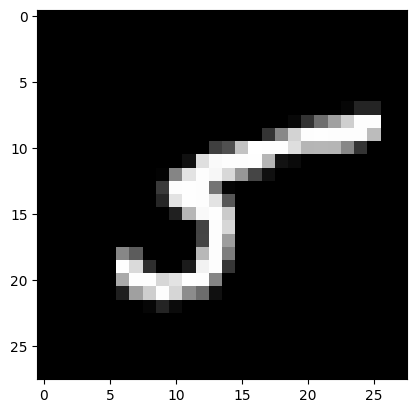

In [ ]:
index = 65
cnt = 0
pyplot.imshow(x_train[index].reshape((28, 28)), cmap="gray")
print(y_train_labels[index])
for index in range(len(x_train)):
    test = list(model(x_train[index]).cpu().detach().numpy())
    max_value = max(test)
    max_index = test.index(max_value)
    # print(index,max_index)
    
    if y_train_labels[index] != max_index:
        print("max_index:",index,max_index,y_train_labels[index])
        cnt += 1
        # pyplot.imshow(x_train[index].reshape((28, 28)), cmap="gray")
print("cnt:",cnt)

In [ ]:
torch.save(model.state_dict(),"mnist_model.pt")
model.load_state_dict(torch.load("mnist_model.pt"))

<All keys matched successfully>

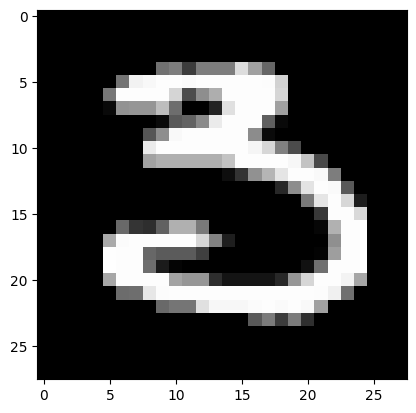

In [ ]:
index = 670
pyplot.imshow(x_train[index].reshape((28, 28)), cmap="gray")

In [ ]:
for name, parameter in train_finish_model.named_parameters():
    print(name,parameter,parameter.size())

hidden1.weight Parameter containing:
tensor([[-0.0133, -0.0011,  0.0189,  ...,  0.0067, -0.0189, -0.0152],
        [ 0.0256,  0.0166, -0.0120,  ..., -0.0167,  0.0165,  0.0281],
        [ 0.0070, -0.0241,  0.0228,  ..., -0.0090, -0.0207,  0.0053],
        ...,
        [-0.0343,  0.0300,  0.0356,  ..., -0.0183,  0.0180,  0.0132],
        [ 0.0145,  0.0093, -0.0356,  ...,  0.0112,  0.0270, -0.0171],
        [ 0.0018, -0.0191, -0.0341,  ...,  0.0075,  0.0205,  0.0171]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([-0.0145, -0.0098,  0.0077,  0.0276, -0.0044, -0.0229, -0.0277,  0.0233,
        -0.0055,  0.0142, -0.0013, -0.0163,  0.0111, -0.0342,  0.0307, -0.0350,
        -0.0296, -0.0170,  0.0263,  0.0200, -0.0339, -0.0287,  0.0236, -0.0352,
        -0.0110, -0.0100,  0.0092, -0.0118, -0.0300,  0.0032,  0.0069, -0.0252,
        -0.0201,  0.0176, -0.0333,  0.0162,  0.0167, -0.0142, -0.0015,  0.0307,
         0.0197, -0.0148, -0.0275,  0.0241, 

# P16 CNN原理与参数解读
CV领域发展   
10~11 年 ML机器学习   
12~14 年 DL 深度学习   
15年超过人类识别   

方向： 检测任务、图像分割、分类和检索（返回相似的）、超分辨率重构、医学任务细胞检测、OCR、 无人驾驶，人脸识别  
nn和cnn的区别 ： 784  28*28   
卷积架构： 
- 输入层 图像
- 卷积层： 特征图
- 池化层
- 全连接层
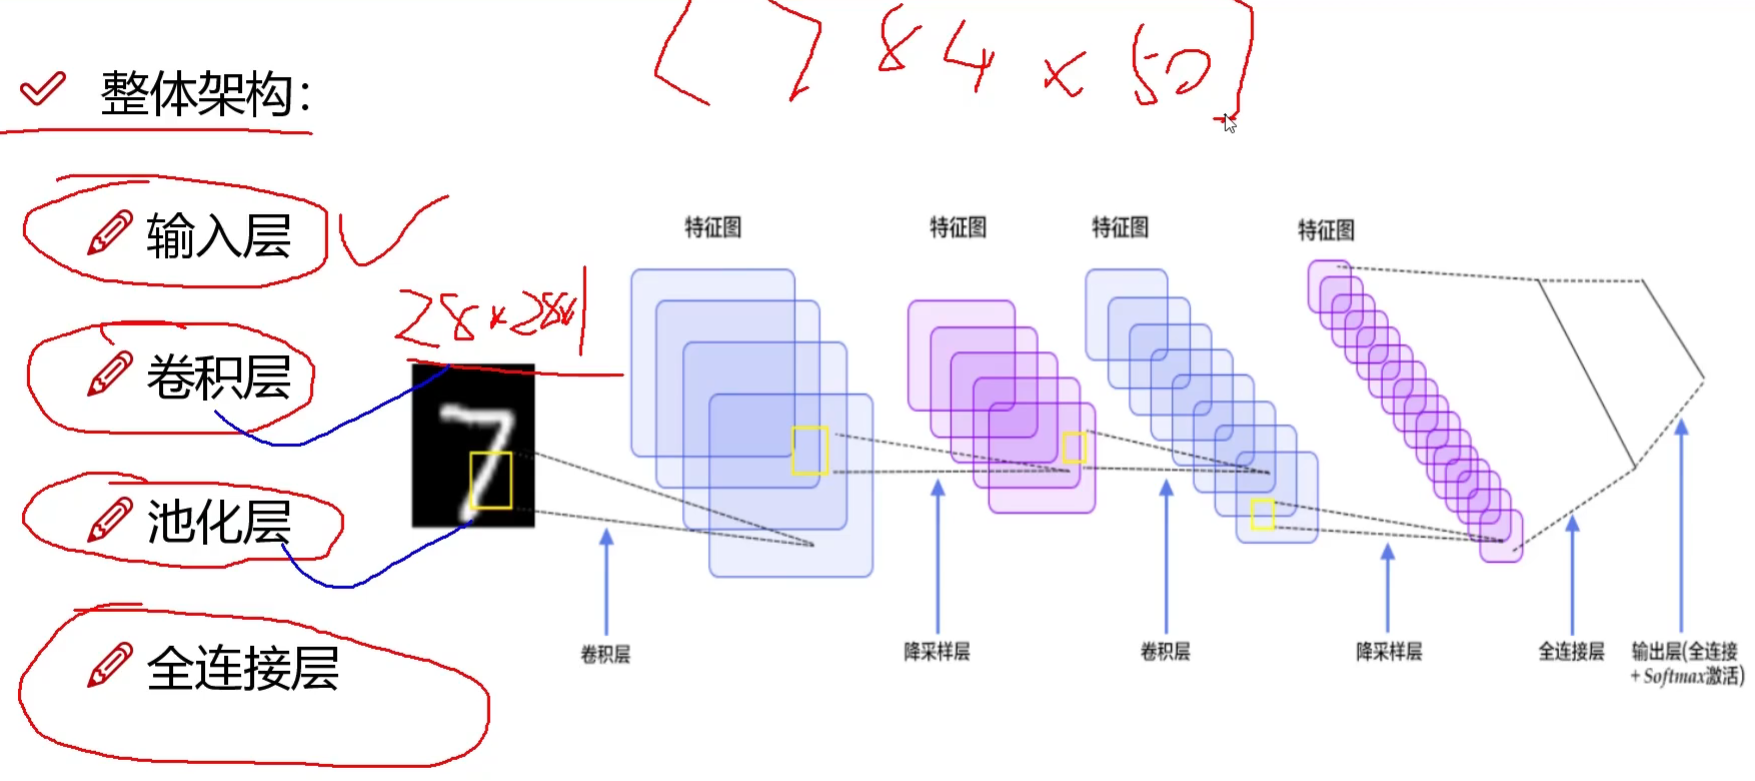

### P22卷积大小计算
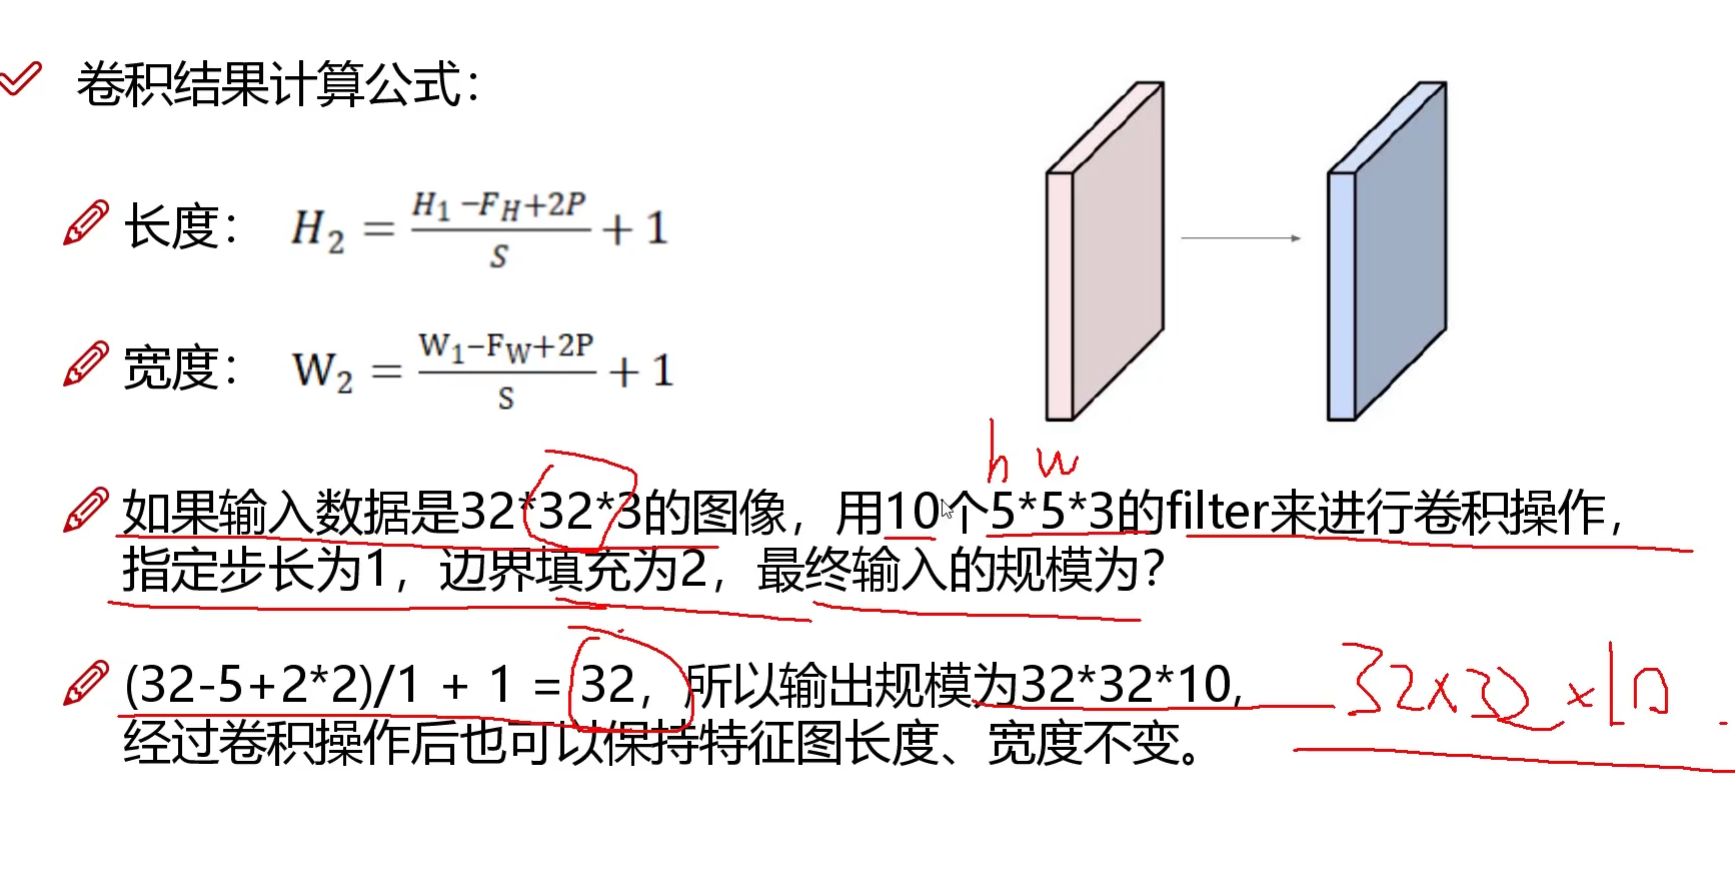
### 参数个数！！比较小
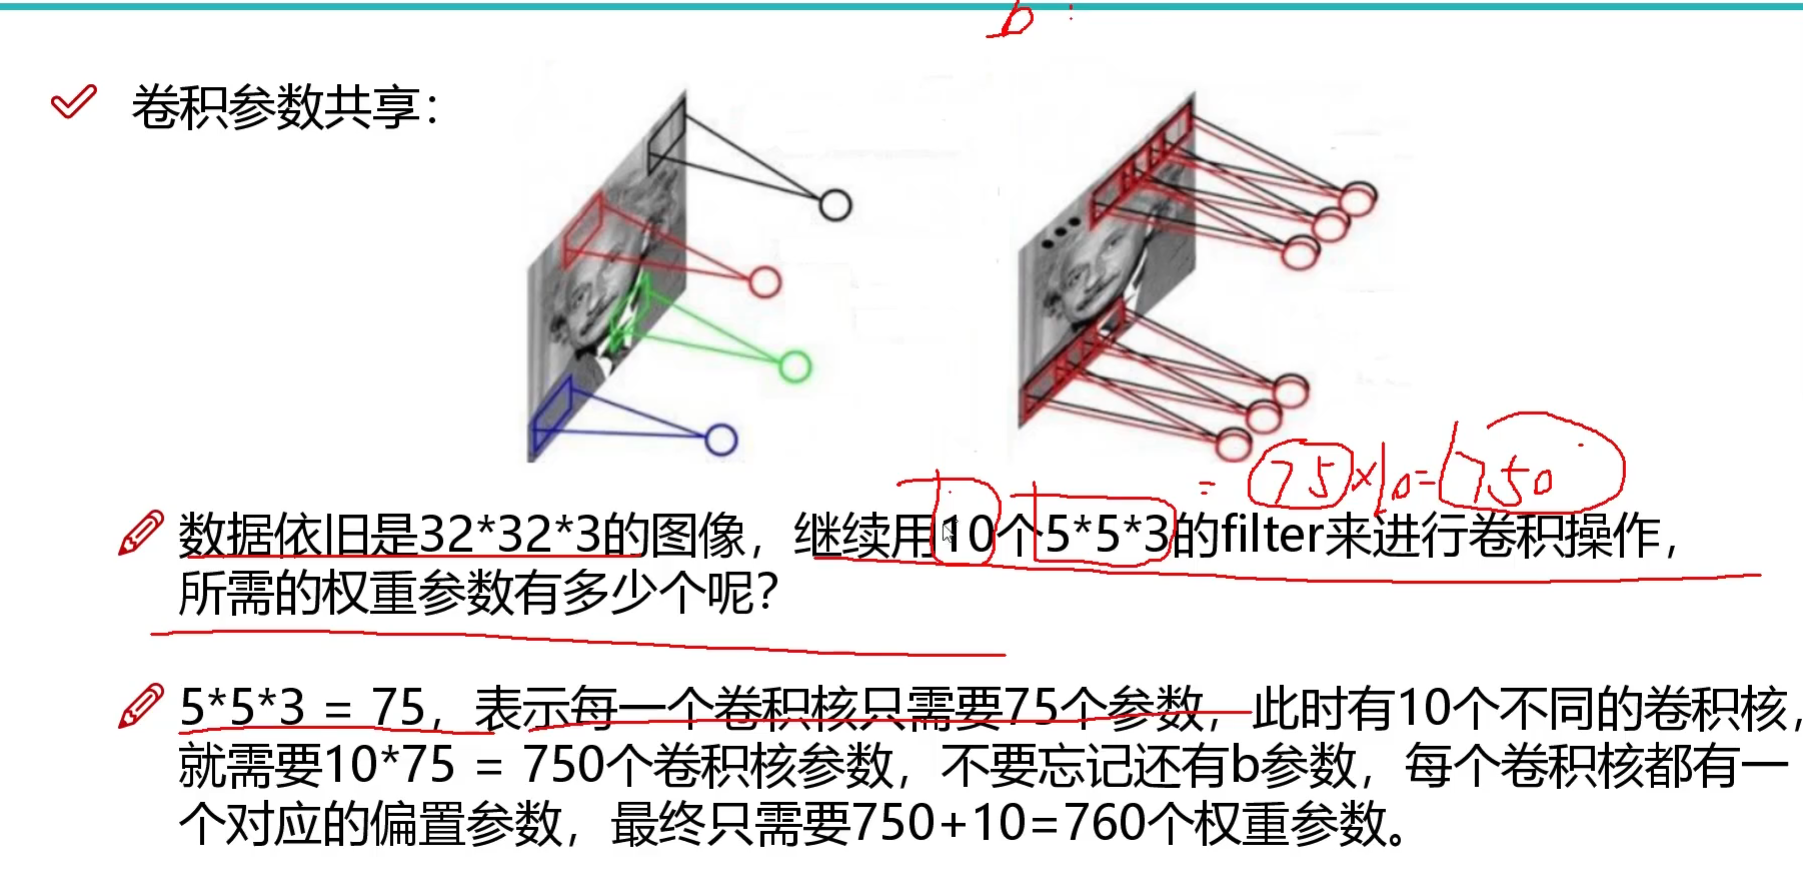
### 池化层pool 瘦身特征图 
- MAX POOLING 最大池化方法（说明这个比较重要的特征）

### 整个结构
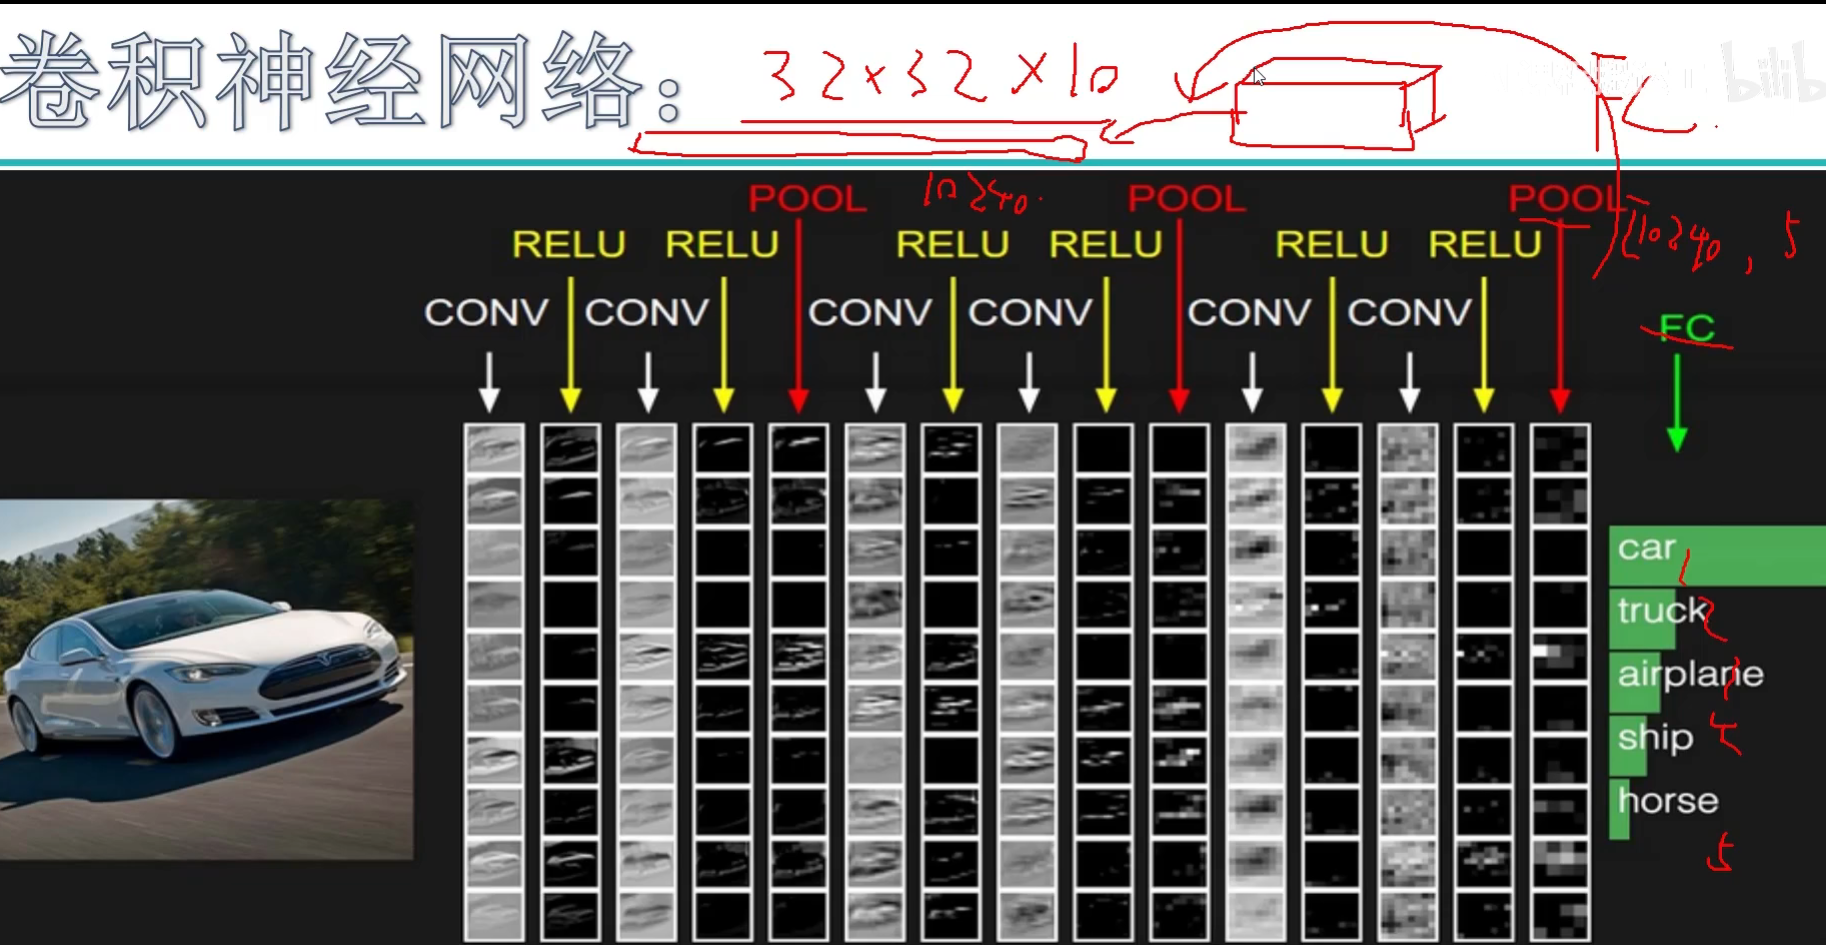

### 网络的发展：
12年
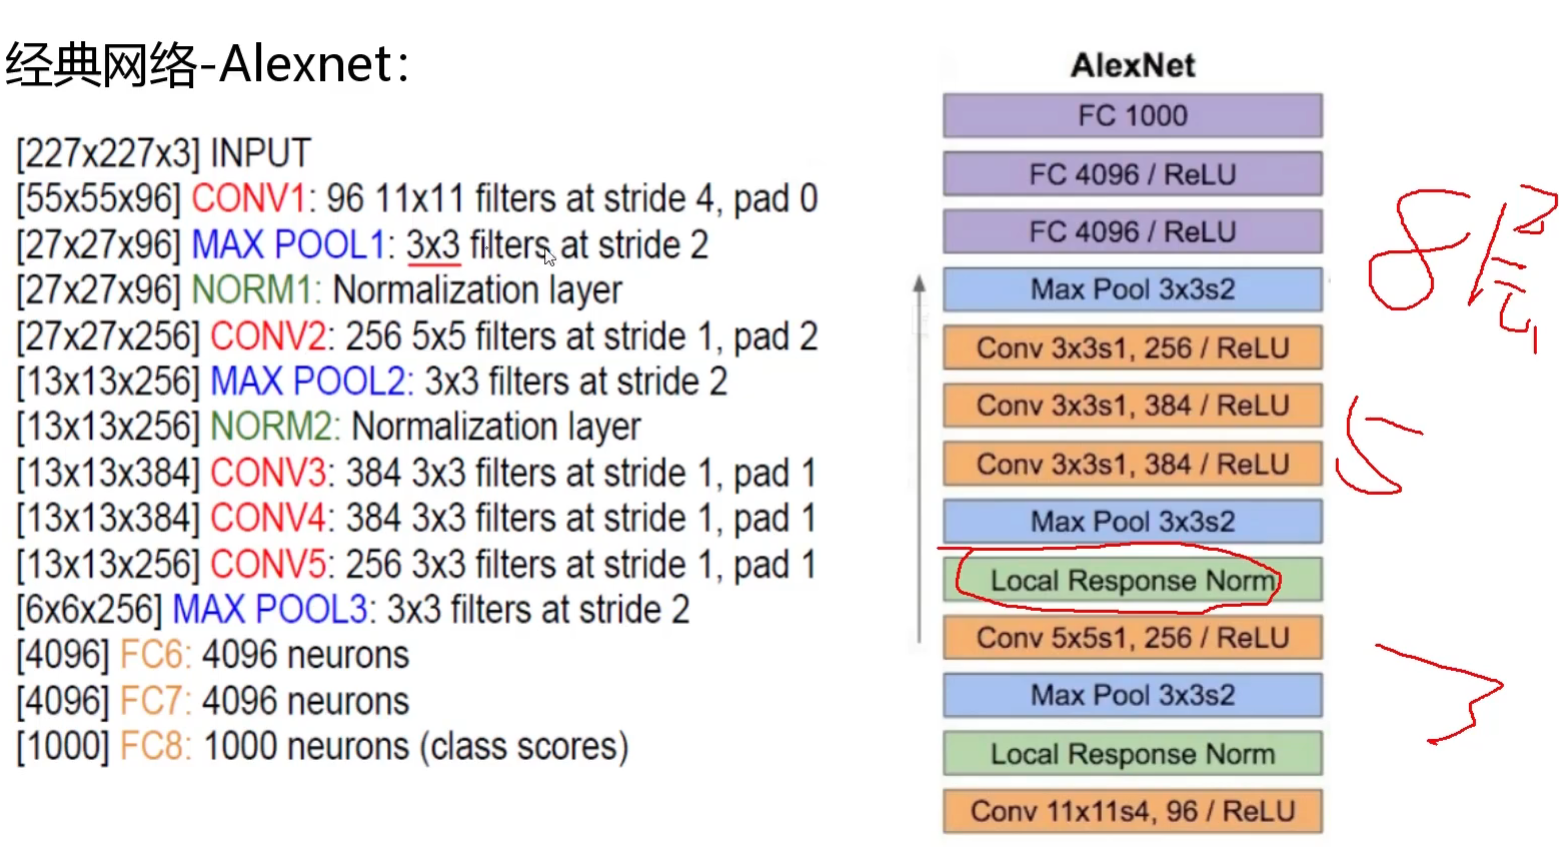
14年
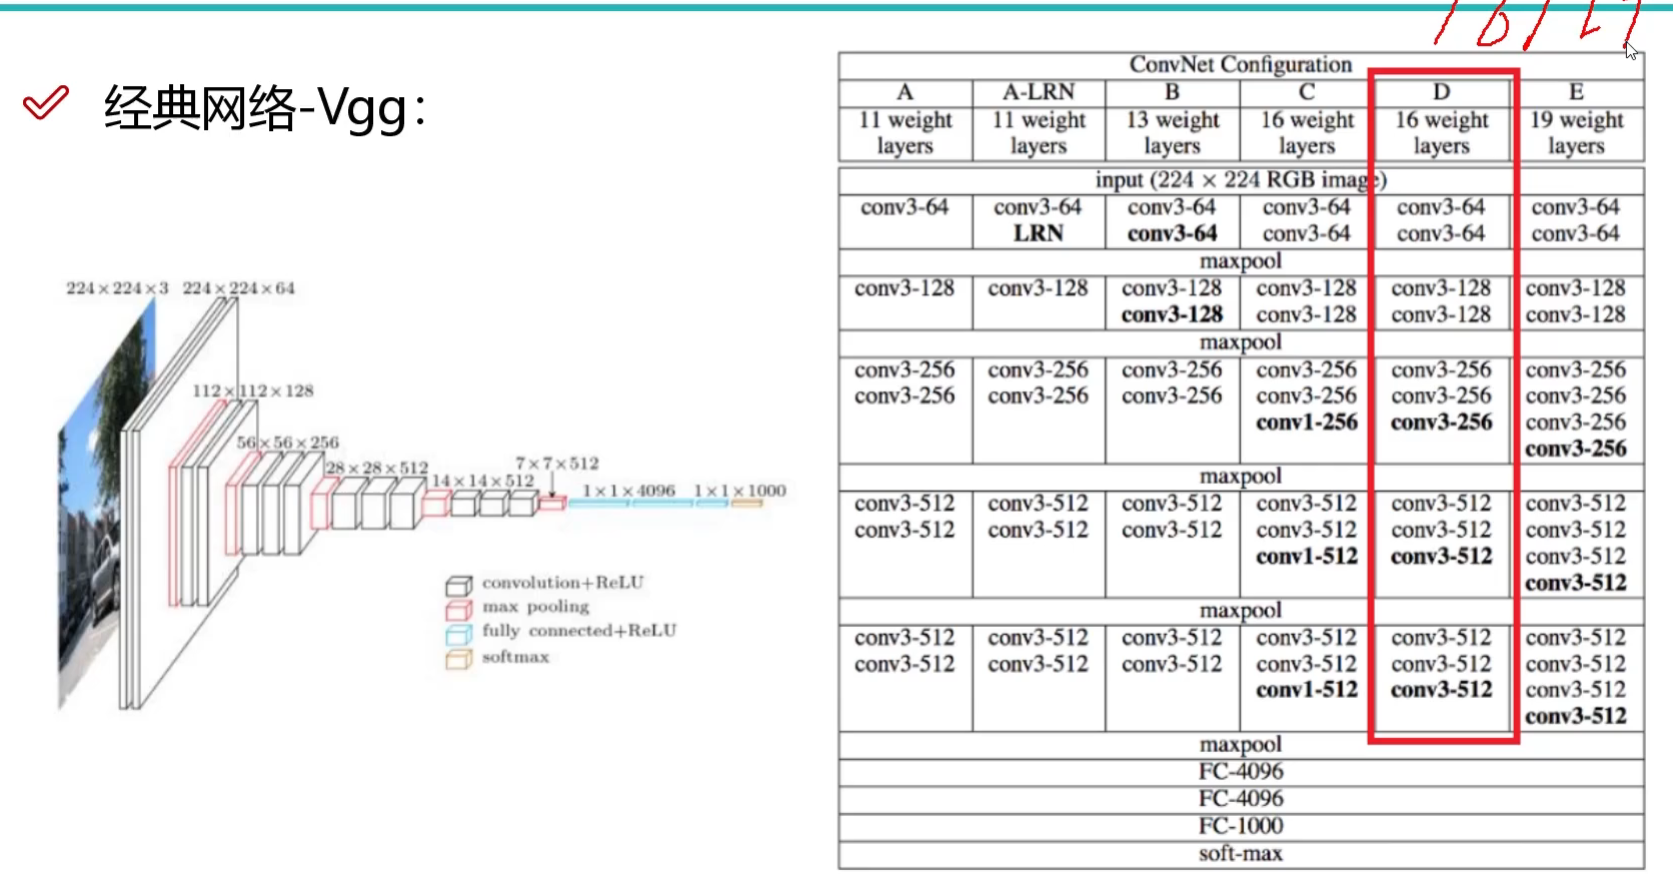
15年 解决层加多之后，加入identity,加入上一层的影响。，残差网络Resnet
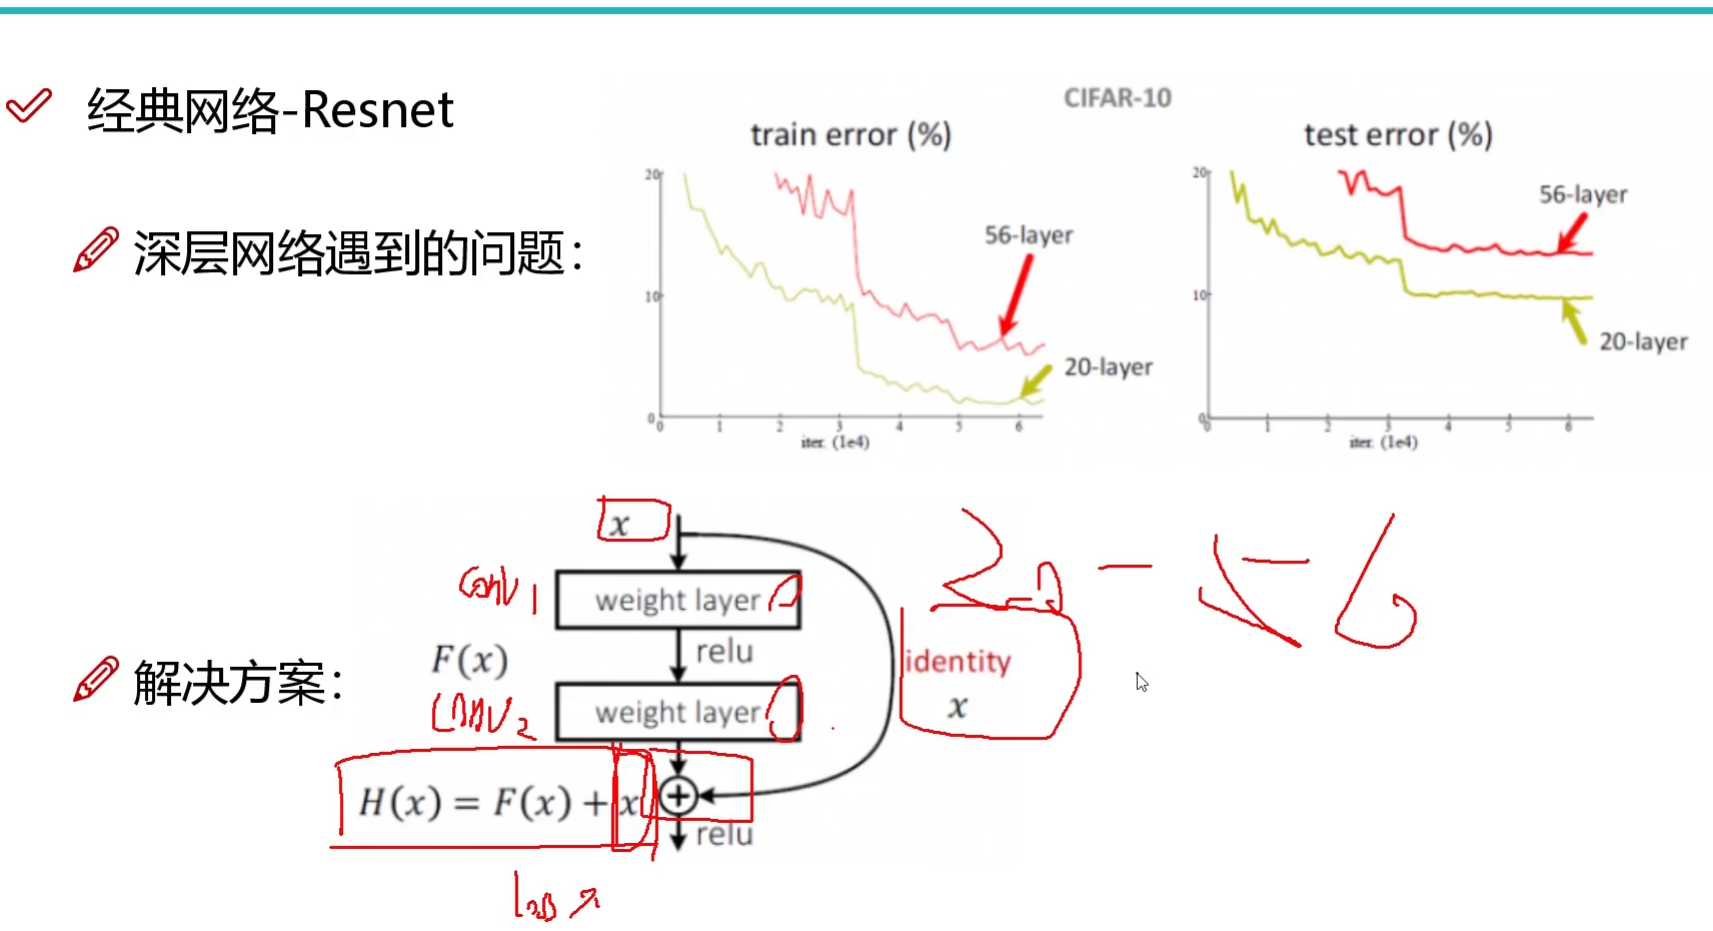

### 感受野：一个点在图像中的因素影响点。
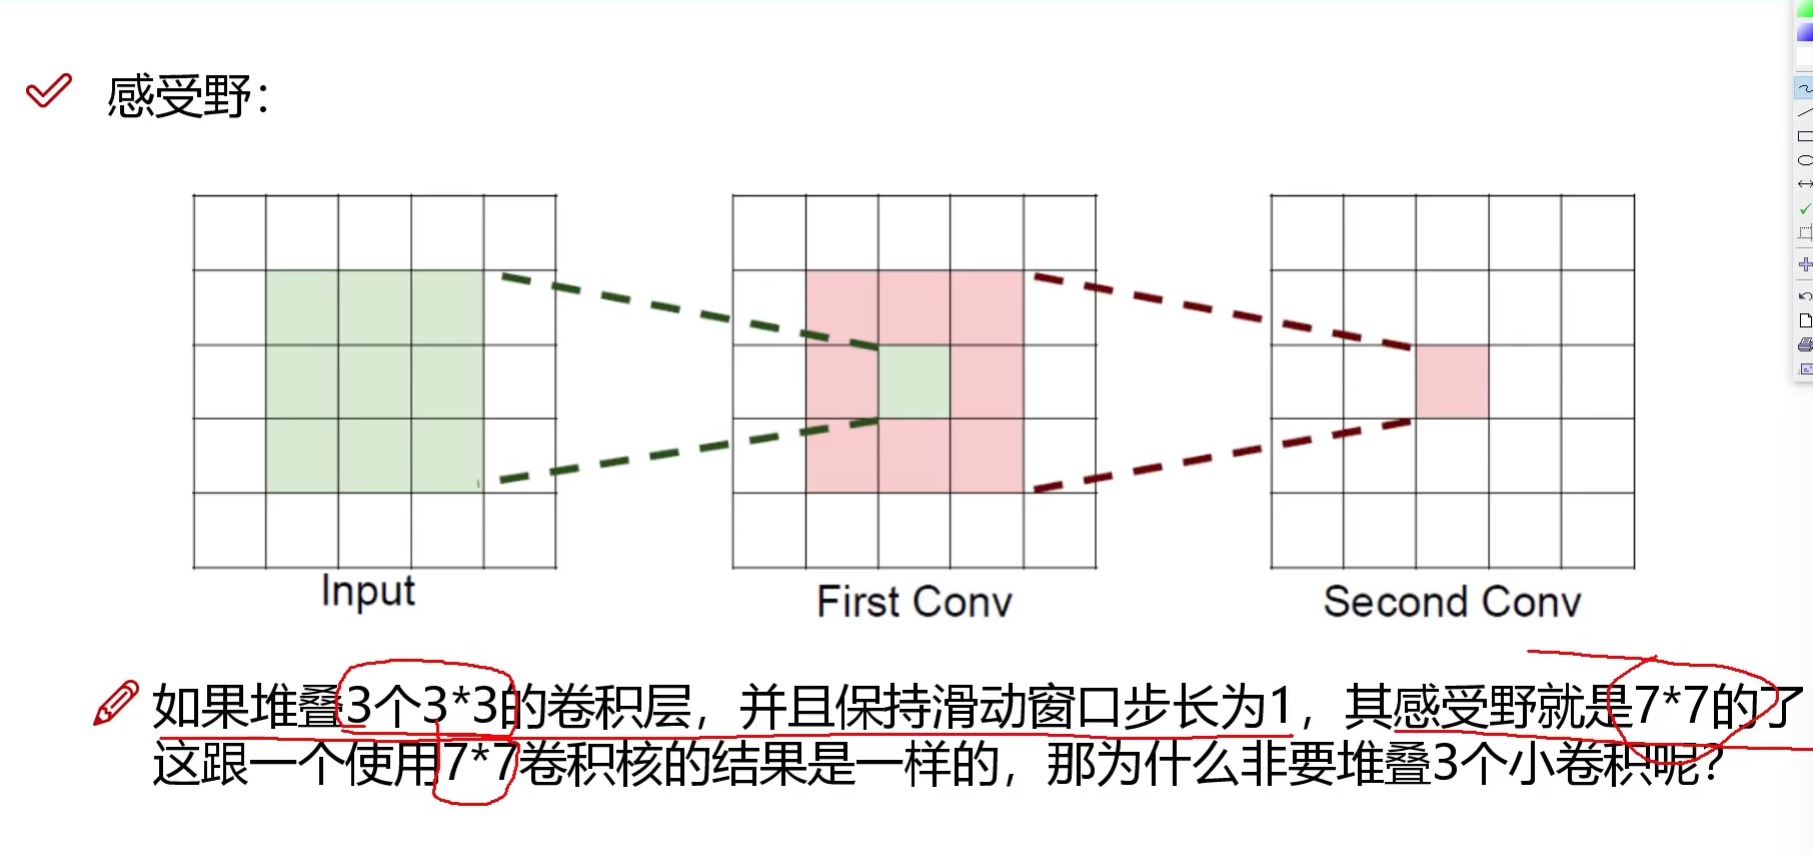